### Intro : State, Node, Edges, attaching functions to node

In [10]:
from typing import Annotated
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages
from langchain_core.messages import HumanMessage, AIMessage
from pydantic import BaseModel
from dotenv import load_dotenv
import random

In [11]:
# This script demonstrates a simple LangGraph workflow for a conversational AI agent.
# It uses a stateful graph to orchestrate a multi-step, message-based interaction.

In [12]:

# Helper function to return a random AI-themed joke
def get_ai_joke():
    jokes = [
        "Why did the AI go to therapy? It had deep learning issues.",
        "I asked my AI assistant to tell me a joke. It replied: 'I'm afraid I can't do that, Dave.'",
        "Why did the neural network break up with the algorithm? It lost its sense of direction.",
        "Why was the robot so bad at soccer? It kept kicking up errors.",
        "Why don't AI systems make good comedians? Their timing is always off… by milliseconds.",
        "How does an AI flirt? It gives you its number… of training epochs.",
        "Why did the AI cross the road? It was part of its training data.",
        "What did the human say to the AI after losing a chess game? 'I need to process my feelings, not just data!'",
        "My AI friend told me it dreams of electric sheep. I told it to lay off the sci-fi books.",
        "Why was the AI so calm during the apocalypse? It had already simulated the outcome 10,000 times."
    ]
    return random.choice(jokes)

# Helper function to return a random funny comment about a joke
def get_funny_comment():
    funny_comments = [
        "Very funny! I almost dropped my coffee... from laughing!",
        "You're on fire today — who wrote your material, is it GPT or Claude?",
        "Nice try! Let's just say your sense of humor is... under development.",
        "Bravo! That joke made me giggle in binary.",
        "That was actually funny. I didn't see it coming, unlike your last five jokes.",
        "Your humor is like an AI model — it gets better the more you train it.",
        "Wow. That joke hit me right in the 'please improve your sense of humor' zone.",
        "Solid effort! Somewhere out there, a dad is proud of that joke."
    ]

    return random.choice(funny_comments)


In [13]:
# Load environment variables (if needed for LangGraph or LangChain integrations)
load_dotenv()

True

In [7]:
## Step 1. Define State
class State(BaseModel):
    # The state holds a list of messages. The add_messages reducer will append new messages to this list.
    messages: Annotated[list, add_messages]

In [14]:


## Step 2 -> start graph builder
graph_builder = StateGraph(State)  # Initialize a stateful graph with the State schema

## Step 3 -> Define Nodes
# Each node is a function that takes the current state and returns a new state
def first_node(old_state: State) -> State:
    # Node 1: Greets the user and tells a random AI joke
    reply = f"""Node 1: Hello, how are you?  let me tell you a joke. 
    {get_ai_joke()}"""
    messages = [{"role": "assistant", "content": reply}]
    
    # State is immutable, so we need to create a new state object
    new_state = State(messages=messages)

    return new_state

def second_node(old_state: State) -> State:
    # Node 2: Responds with a funny comment about the joke
    reply = f"""Node 2: {get_funny_comment()}"""
    messages=[{"role": "assistant", "content":reply}]
    # State is immutable, so we need to create a new state object
    new_state = State(messages=messages)
    return new_state

## add nodes to graph
graph_builder.add_node("first_node", first_node)  # Add the first node to the graph
graph_builder.add_node("second_node", second_node)  # Add the second node to the graph


##Step 4 -> create edge
# Define the flow of the conversation by connecting nodes
graph_builder.add_edge(START, "first_node")  # Start -> first_node
graph_builder.add_edge("first_node", "second_node")  # first_node -> second_node
graph_builder.add_edge("second_node", END)  # second_node -> End


##Step 5 -> compile graph
graph = graph_builder.compile()  # Compile the graph into an executable workflow

##Step 6 -> invoke graph
messages=[{"role": "human", "content": "Hello, how are you?"}]
# Create the initial state with a human message
state = State(messages=messages)
result = graph.invoke(state)  # Run the graph with the initial state


##Step 7 -> print messages
messages = result["messages"]
# Print the assistant's messages from the graph execution
print("\nResponse:")
for message in messages:
    if isinstance(message, HumanMessage):
        pass  # Skip human messages in output
    elif isinstance(message, AIMessage):
        print(f"{message.content}")



Response:
Node 1: Hello, how are you?  let me tell you a joke. 
    I asked my AI assistant to tell me a joke. It replied: 'I'm afraid I can't do that, Dave.'
Node 2: Bravo! That joke made me giggle in binary.


### Display graph

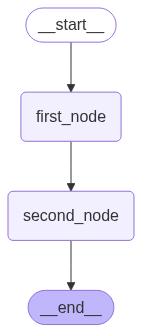

In [15]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))